In [3]:
# IMPORT LIBRARYS
import inference
import numpy as np
import supervision as sv
import matplotlib.pyplot as plt
import cv2

In [4]:
# HYPERPARAMETERS
matrix_rows = 2
matrix_columns = 2
cell_w = 300
cell_h = 300
x_start = 0
y_start = 0
confidence = 0.75

In [5]:
# DATA MAP
data_map = {
    0: "Enfermedad del caucho",
    1: "Moho gris",
    2: "Mildiu polvoriento",
    3: "Mildiu polvoriento",
    4: "Saludable",
}
good_id = 4

In [6]:
# LOAD THE MODEL
model = inference.get_model(model_id="planeacv/3", api_key="677zUfevc56vxHO4J4Yn")

In [7]:
# PLOT IMAGE WITH ANNOTATIONS
def plotInference(img: np.ndarray, infer: list) -> None:
    # load the results into the supervision Detections api
    detections = sv.Detections.from_inference(infer[0])
    labels = [data_map[pred.class_id] for pred in infer[0].predictions]

    # create supervision annotators
    bounding_box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    # annotate the image with the inference results
    annotated_image = bounding_box_annotator.annotate(scene=img.copy(), detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)
    # display the image
    sv.plot_image(annotated_image)

In [ ]:
def decodeInference(infer: list):
    

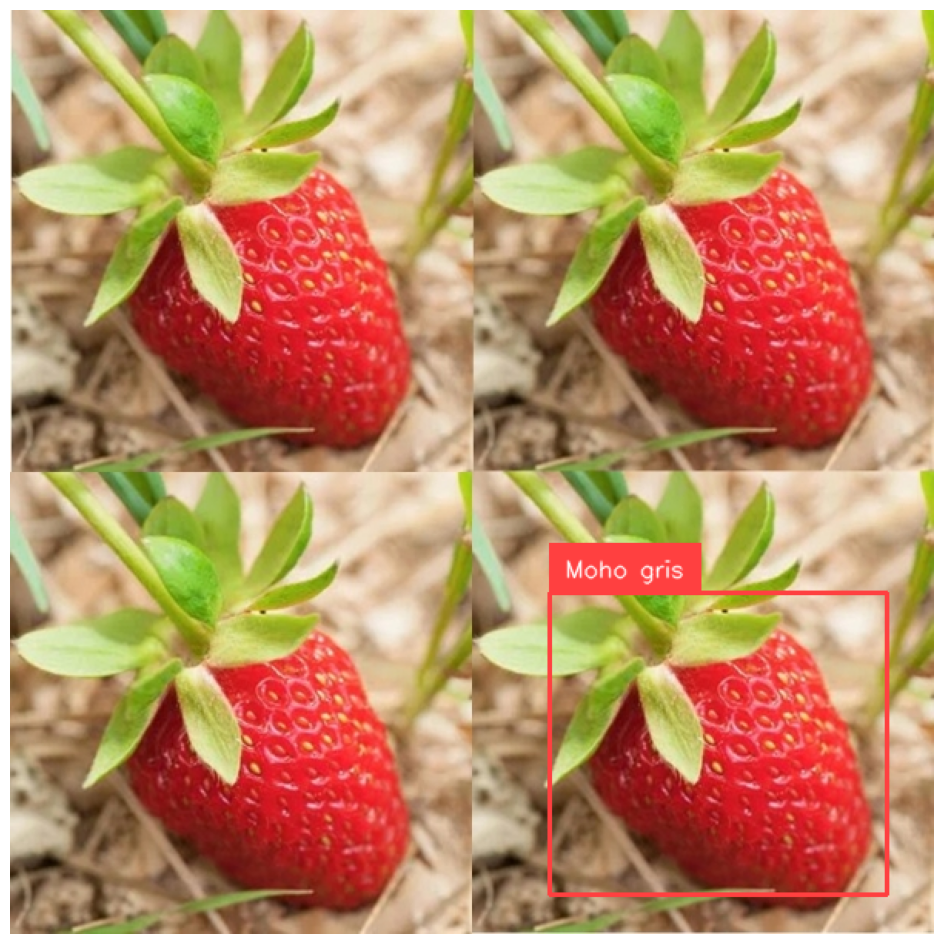

[ObjectDetectionInferenceResponse(visualization=None, inference_id=None, frame_id=None, time=None, image=InferenceResponseImage(width=600, height=600), predictions=[ObjectDetectionPrediction(x=459.5, y=476.0, width=219.0, height=196.0, confidence=0.4551953077316284, class_name='Benh dom den', class_confidence=None, class_id=1, tracker_id=None, detection_id='3f831a0a-c30e-421e-8cf0-66ba8cefe7b6', parent_id=None)])]


In [ ]:
img = cv2.imread("./grid1.jpg")
infer = model.infer(img)
plotInference(img, infer)
print(infer)

In [8]:
# Read Image && Create Matrix
image_file = "./grid2.jpg"
image = cv2.imread(image_file)
#plotInference(image,model.infer(image))
#matrix_ = createMatrix(image)
# Tenemos dos opciones, separarlo en grids, o hacer primero las predicciones y luego ubicar en que grid esta